<a href="https://colab.research.google.com/github/anajikadam/ML_Projects-2023/blob/main/FS_EmbeddedMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularized Models

Regularized linear models are linear models that include a penalty term in the loss function during training. The penalty term discourages the learning of a too complex model, which can help prevent overfitting.

### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)
X_train.shape

(614, 8)

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

In [6]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [8]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

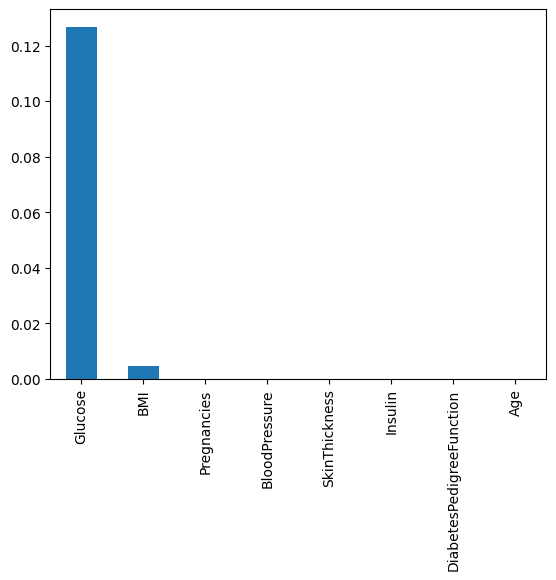

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### Feature Selection using Decision Tree

In [10]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [12]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [13]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
rf.feature_importances_

array([0.08646253, 0.25947001, 0.08948223, 0.07005645, 0.08038883,
       0.15600236, 0.13191418, 0.12622343])

<Axes: >

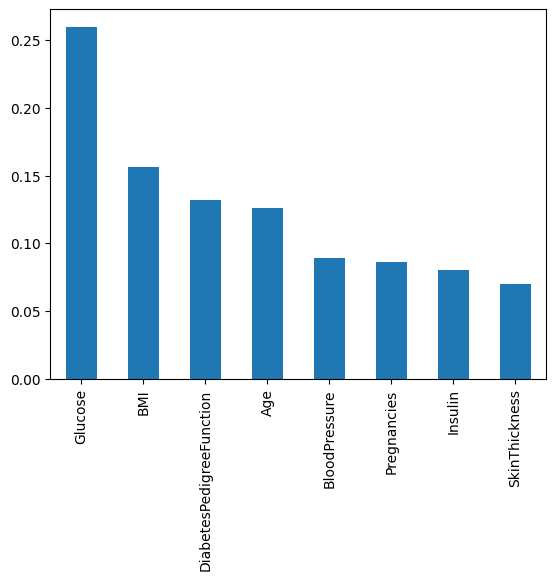

In [15]:
x = pd.Series(np.abs(rf.feature_importances_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

# SelectFromModel

`class sklearn.feature_selection.SelectFromModel(estimator, *, threshold=None, )`


https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

Meta-transformer for selecting features based on importance weights.

In [16]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [19]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')
sfm1 = SelectFromModel(model, threshold=0.1)

In [20]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [21]:
sfm.get_support(indices=True)

array([1, 5, 7])

In [22]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [24]:
sfm1.fit(X_train, y_train)
sfm1.get_support(indices=True)
sfm1.feature_names_in_[sfm1.get_support(indices=True)]


array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [25]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


# Recursive Feature Selection

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features, and each feature’s importance is obtained either through a coef_ attribute or a feature_importances_  attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

`class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')`

N_features_to_select: int or float, default=None

The number of features to select. If None, half of the features are selected. If integer, the parameter is the absolute number of features to select. If float between 0 and 1, it is the percentage of features to select.


In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [29]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [31]:
rf.feature_importances_

array([0.08541759, 0.02616893, 0.46007574, 0.42833773])

In [32]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [33]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.21661258, 0.43072688, 0.35266053])

In [34]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.48844024, 0.51155976])

In [36]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### Sklearn RFE

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2


In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFECV(estimator=model, cv=5)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 1
sepal_width: 1
petal_length: 1
petal_width: 1


### Mutual Info


Mutual Information: Measures the dependency between two variables.
It's a more general form of the correlation coefficient and can capture
non-linear dependencies. Use this when you want to measure both linear
and non-linear dependencies between features and the target variable.

In [41]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [42]:
marginal = pd.crosstab(df['A'], df['B'], margins=True)
marginal

B,b1,b2,All
A,,,
a1,2,2,4
a2,2,2,4
All,4,4,8


In [43]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob


B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.4572935616048923
Feature 1: Mutual Information = 0.27951168861139974
Feature 2: Mutual Information = 0.9998673613769551
Feature 3: Mutual Information = 0.9965899732435837


## SelectKBest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]


Mutual Information has several properties that make it useful for feature selection:

1. It is non-negative: MI is always zero or positive, with zero indicating that the variables are independent (ie., no information about one variable can be obtained by observing the other variable).

2. It is symmetric: MI(X, Y)= MI(Y, X). The mutual information from X to Y is the same as from Y to X.

3. It can capture kind of statistical dependency: Unlike correlation, which only captures linear-relationships, mutual information can capture any kind of relationship, inding nonlinear ones.


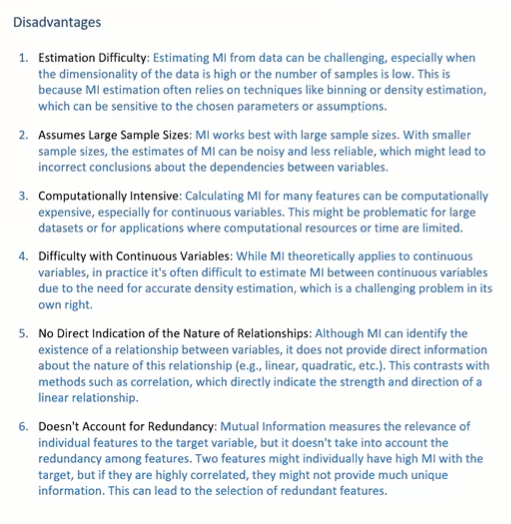

# Embedded Method Advantages:

Performance: They are generally more accurate than filter methods since they take the interactions between features into account.


Efficiency: They are more computationally efficient than wrapper methods since they fit the model only once.


Less Prone to Overfitting: They introduce some form of regularization, which helps to avoid overfitting. For example, Lasso and Ridge regression add a penalty to the loss function, shrinking some coefficients to zero.

# Embedded Method  Disadvantages:
Model Specific: Since they are tied to a specific machine learning model, the selected features are not necessarily optimal for other models.


Complexity: They can be more complex and harder to interpret than filter methods. For example, understanding why Lasso shrinks some coefficients to zero and not others can be non-trivial.


Tuning Required: They often have hyperparameters that need to be tuned, like the
regularization strength in Lasso and Ridge regression.


Stability: Depending on the model and the data, small changes in the data can result in different sets of selected features. This is especially true for models that can fit complex decision boundaries, like decision trees.

# 1. Filter Methods:

- Variance Threshold: Removes all features whose variance doesn’t meet a
certain threshold. Use this when you have many features and you want to
remove those that are constants or near constants.


- Correlation Coefficient: Finds the correlation between each pair of
features. Highly correlated features can be removed since they contain
similar information. Use this when you suspect that some features are
highly correlated.

- Chi-Square Test: This statistical test is used to determine if there’s a
significant association between two variables. It's commonly used for
categorical variables. Use this when you have categorical features and you
want to find their dependency with the target variable.

- Mutual Information: Measures the dependency between two variables.
It's a more general form of the correlation coefficient and can capture
non-linear dependencies. Use this when you want to measure both linear
and non-linear dependencies between features and the target variable.


- ANOVA (Analysis of Variance): ANOVA is a statistical test that stands for
"Analysis of Variance". ANOVA tests the impact of one or more factors by
comparing the means of different samples. Use this when you have one or
more categorical independent variables and a continuous dependent
variable.




# 2. Wrapper Methods:

- Recursive Feature Elimination (RFE): Recursively removes features, builds
a model using the remaining attributes, and calculates model accuracy. It
uses model accuracy to identify which attributes contribute the most. Use
this when you want to leverage the model to identify the best features.


- Sequential Feature Selection (SFS): Adds or removes one feature at the
time based on the classifier performance until a feature subset of the
desired size k is reached. Use this when computational cost is not an issue
and you want to find the optimal feature subset.


- Exhaustive Feature Selection: This is a brute-force evaluation of each
feature subset. This method, as the name suggests, tries out all possible
combinations of variables and returns the best subset. Use this when the
number of features is small, as it can be computationally expensive.

# 3. Embedded Methods:

- Lasso Regression: Lasso (Least Absolute Shrinkage and Selection Operator)
is a regression analysis method that performs both variable selection and
regularization. Use this when you want to create a simple and
interpretable model.


- Ridge Regression: Ridge regression is a method used to analyze multiple
regression data that suffer from multicollinearity. Unlike Lasso, it doesn't
lead to feature selection but rather minimizes the complexity of the
model.


- Elastic Net: This method is a combination of Lasso and Ridge. It
incorporates penalties from both methods and is particularly useful when
there are multiple correlated features.


- Random Forest Importance: Random forests provide a straightforward
method for feature selection, namely mean decrease impurity (MDI). Use
this when you want to leverage the power of random forests for feature
selection.